# Logistic Regression

Logistic regression is a  statistical model that in its basic form uses a logistic function to model a binary dependent variable. In regression analysis, logistic regression (or logit regression) is estimating the parameters of a logistic model (a form of binary regression). 

where: $y$ is the dependent variable, $x_1, x_2, ..., x_n$ are the independent variables, $\beta_0, \beta_1, \beta_2, ..., \beta_n$ are the coefficients, and $\epsilon$ is the error term.

This is simplified into 

$$\hat{z} = w \cdot X + b$$
$$\hat{y} = \frac{1}{1 + e^{-\hat{z}}}$$

where $w$ is the weight vector, $X$ is the feature vector, and $b$ is the bias.

the second equation is also known as the sigmoid function $\sigma(z)$. The sigmoid function is a mathematical function having a characteristic "S"-shaped curve or sigmoid curve. Often, sigmoid function refers to the special case of the logistic function.



In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

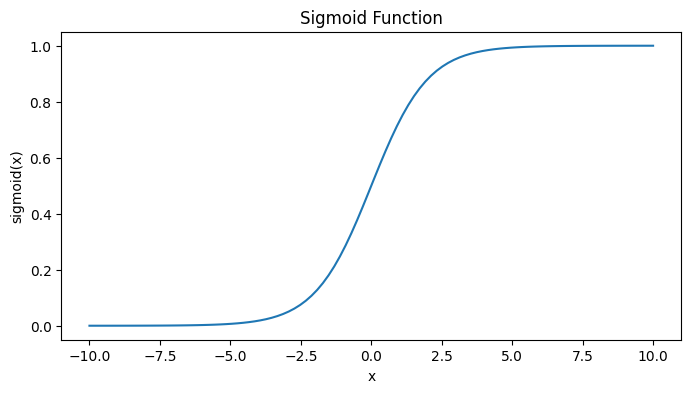

In [3]:
x = np.linspace(-10, 10, 100)
y = sigmoid(x)

plt.figure(figsize=(8, 4))
plt.plot(x, y, label="Sigmoid Function")
plt.title("Sigmoid Function")
plt.xlabel("x")
plt.ylabel("sigmoid(x)")
plt.show()

## Goal

Approximate $w$ and $b$ such that the model can predict the output $\hat{y}$ as close as possible to the actual output $y$.

## Cost Function

The cost function is the measured using binary cross entropy loss function. It is defined as:

$$ \text{Loss} = - \frac{1}{N} \sum_{i=1}^{N} \left[ y_i \log(\hat{y}_i) + (1 - y_i) \log(1 - \hat{y}_i) \right] $$

where:
- $ \hat{y}_i $ is the predicted probability for the \(i\)-th example.
- $ y_i $ is the true label (0 or 1).


**Binary Cross Entropy Loss** is a loss function used for binary classification problems. It is a measure of how well the model is able to predict the expected outcome.

In the extreme cases, when the value is 0/1 and prediction is 1/0, the loss is:

$$ - \frac{1}{N} \sum_{i=1}^{N} \left[ 0 \log(1) + 1 \log(0) \right] = \infty $$

And when the loss should be minimum when value is 0/1 and prediction is 0/1:

$$ - \frac{1}{N} \sum_{i=1}^{N} \left[ 1 \log(1) + 0 \log(0) \right] = 0 $$

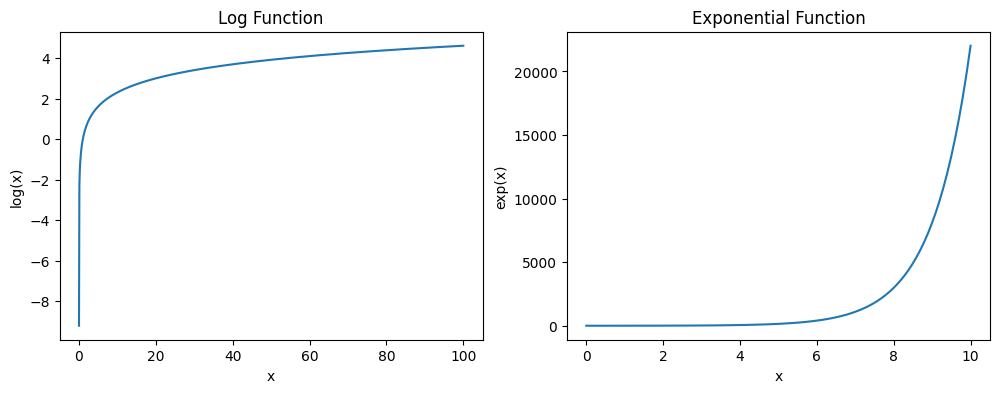

In [4]:
_, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))

x1 = np.linspace(0.0001, 100, 1000)
y = np.log(x1)
x2 = np.linspace(0, 10, 100)
z = np.exp(x2)

ax1.plot(x1, y, label="Log Function")
ax1.set_title("Log Function")
ax1.set_xlabel("x")
ax1.set_ylabel("log(x)")

ax2.plot(x2, z, label="Exponential Function")
ax2.set_title("Exponential Function")
ax2.set_xlabel("x")
ax2.set_ylabel("exp(x)")

plt.show();

In [5]:
def binary_crossentropy(y_true, y_pred):
    return np.sum(y_true * np.log(y_pred) + (1-y_true) * np.log(1-y_pred)) / -len(y_true)

In [6]:
from sklearn import datasets
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

In [7]:
X, y = datasets.make_classification(n_samples=200, n_features=4, n_classes=2, random_state=11)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=11)

In [22]:
def plot(X, y, title='', model=None):
    fig, axs = plt.subplots(2, 2, figsize=(7, 7))
    for i in range(4):
        ax = axs[i // 2, i % 2]
        sns.scatterplot(x=X[:, i], y=y, hue=y, ax=ax)
        ax.set_title(f'Feature {i}')

        if model is not None:
            # Generate values for decision boundary
            x_values = np.linspace(X[:, i].min(), X[:, i].max(), 100)
            # get the probability for each class label
            probs = model.predict_proba(np.c_[x_values, np.zeros((100, X.shape[1] - 1))])
            if len(probs.shape) > 1 and probs.shape[1] > 1:
                probs = probs[:, 1]

            ax.plot(x_values, probs, color='red', label="Decision Boundary")
            ax.legend()

    plt.suptitle(title)
    plt.show()

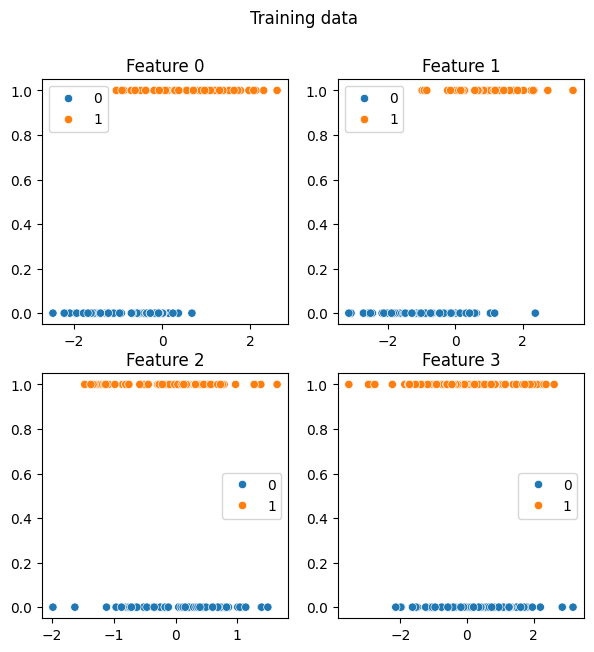

In [23]:
plot(X_train, y_train, title='Training data')

### Using scikit learn

In [24]:
model_sk = LogisticRegression()
model_sk.fit(X_train, y_train)
y_pred_sk = model_sk.predict(X_test)

print(f"Accuracy: {accuracy_score(y_test, y_pred_sk)}")

Accuracy: 0.95


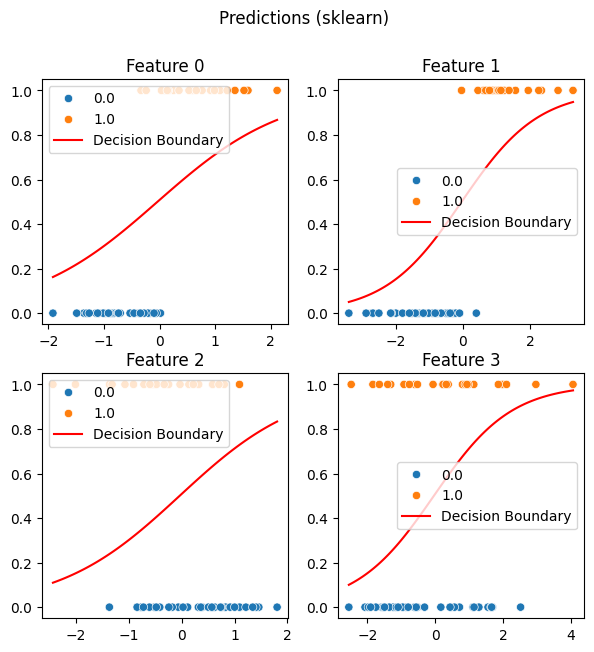

In [25]:
plot(X_test, y_pred_sk, title='Predictions (sklearn)', model=model_sk)

$$ \dots $$

### Implementing Logistic Regression

In logistic regression, the relationship between the features and the target is modeled using the logistic function. The output is given by:

$ \hat{y} = \sigma(X \cdot \theta) $

where:
- $ X $ is an $ m \times n $ matrix (with $ m $ samples and $ n $ features).
- $ \theta $ is the vector of parameters (coefficients).
- $ \hat{y} $ is the vector of predicted probabilities, defined as:

$ \sigma(z) = \frac{1}{1 + e^{-z}} $

We augment $ X $ with a column of ones (denoted $ X_b $) to account for the intercept term:

$ X_b = \begin{bmatrix} x_{11} & x_{12} & \dots & x_{1n} & 1 \\ x_{21} & x_{22} & \dots & x_{2n} & 1 \\ \vdots & \vdots & \vdots & \ddots & \vdots \\  x_{m1} & x_{m2} & \dots & x_{mn} & 1 \end{bmatrix} $

The goal is to find the parameter vector $ \theta $ that maximizes the likelihood of the observed data. This is formalized using the **log-likelihood function**:

$ L(\theta) = \sum_{i=1}^{m} \left( y_i \log(\hat{y}_i) + (1 - y_i) \log(1 - \hat{y}_i) \right) $

where $ y_i $ is the actual binary target value (0 or 1).

### Cost Function

The cost function for logistic regression is:

$ J(\theta) = -\frac{1}{m} \sum_{i=1}^{m} \left( y_i \log(\hat{y}_i) + (1 - y_i) \log(1 - \hat{y}_i) \right) $

where $ \hat{y}_i = \sigma(X_i \cdot \theta) $ is the predicted probability for the $ i $-th sample.

**Substitute the Predicted Probability**:

Start by substituting $ \hat{y}_i $:

$$ J(\theta) = -\frac{1}{m} \sum_{i=1}^{m} \left( y_i \log(\sigma(X_i \cdot \theta)) + (1 - y_i) \log(1 - \sigma(X_i \cdot \theta)) \right) $$


**Differentiate $ J(\theta) $**:

$$ \frac{\partial J(\theta)}{\partial \theta_j} = -\frac{1}{m} \sum_{i=1}^{m} \left( y_i \frac{1}{\hat{y}_i} \frac{\partial \hat{y}_i}{\partial \theta_j} + (1 - y_i) \frac{-1}{1 - \hat{y}_i} \frac{\partial \hat{y}_i}{\partial \theta_j} \right) $$

Here, $ \frac{\partial \hat{y}_i}{\partial \theta_j} $ is what we need to compute next.

$ \sigma(z) = \frac{1}{1 + e^{-z}} $

$ \sigma'(z) = \sigma(z)(1 - \sigma(z)) $



For our case, $ z = X_i \cdot \theta $, so:

$$ \frac{\partial \hat{y}_i}{\partial \theta_j} = \sigma(X_i \cdot \theta)(1 - \sigma(X_i \cdot \theta)) X_{ij} = \hat{y}_i(1 - \hat{y}_i) X_{ij} $$


Substitute the derivative of $ \hat{y}_i $ back into the expression for the gradient:

$$ \frac{\partial J(\theta)}{\partial \theta_j} = -\frac{1}{m} \sum_{i=1}^{m} \left( y_i \frac{1}{\hat{y}_i} \hat{y}_i(1 - \hat{y}_i) X_{ij} - (1 - y_i) \frac{1}{1 - \hat{y}_i} \hat{y}_i(1 - \hat{y}_i) X_{ij} \right) $$

   Simplifying gives:
   $$ \frac{\partial J(\theta)}{\partial \theta_j} = -\frac{1}{m} \sum_{i=1}^{m} \left( y_i (1 - \hat{y}_i) X_{ij} - (1 - y_i) \hat{y}_i X_{ij} \right) $$

   This can be rewritten as:
   $$ \frac{\partial J(\theta)}{\partial \theta_j} = -\frac{1}{m} \sum_{i=1}^{m} (y_i - \hat{y}_i) X_{ij} $$

1. **Final Gradient Expression**:
   Therefore, the gradient of the cost function in vector form is:
   $$ \nabla_\theta J(\theta) = -\frac{1}{m} X^T (y - \hat{y}) $$

The final transpose of $ X $ is taken to ensure that the dimensions match (i.e., $ X^T $ is $ n \times m $, and $ y - \hat{y} $ is $ m \times 1 $) giving a gradient vector of $ n \times 1 $ where each value is corresponding to each feature.

In [29]:
class LogisticRegression:
    def __init__(self, lr=0.01, n_iters=1000):
        self.lr = lr
        self.n_iters = n_iters
        self.weights = None
        self.bias = None

    def fit(self, X, y):
        # initialize parameters with zeros
        self.weights = np.zeros(X.shape[1])
        self.bias = 0

        # stochastic gradient descent, can be replaced with
        # batch or mini-batch gradient descent for faster convergence
        # or batch gradient descent for better convergence
        for _ in range(self.n_iters):
            # calculate the linear model
            lin_model = np.dot(X, self.weights) + self.bias
            # apply the sigmoid function to get the probabilities
            y_pred = sigmoid(lin_model)

            # calculate the gradients for the weights and bias
            dw = (1 / len(X)) * np.dot(X.T, (y_pred - y))
            db = (1 / len(X)) * np.sum(y_pred - y)

            # update the weights and bias
            self.weights -= self.lr * dw
            self.bias -= self.lr * db

    def predict(self, X):
        # for prediction, apply the same process as in the fit method
        linear_model = np.dot(X, self.weights) + self.bias
        y_pred = sigmoid(linear_model)
        # round the probabilities to get the class labels
        return np.round(y_pred)

    def predict_proba(self, X):
        linear_model = np.dot(X, self.weights) + self.bias
        probs = sigmoid(linear_model)
        # return the probabilities for both classes
        probs = np.c_[1 - probs, probs]
        return probs

In [30]:
model = LogisticRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print(f"Accuracy: {accuracy_score(y_test, y_pred)}")

Accuracy: 0.95


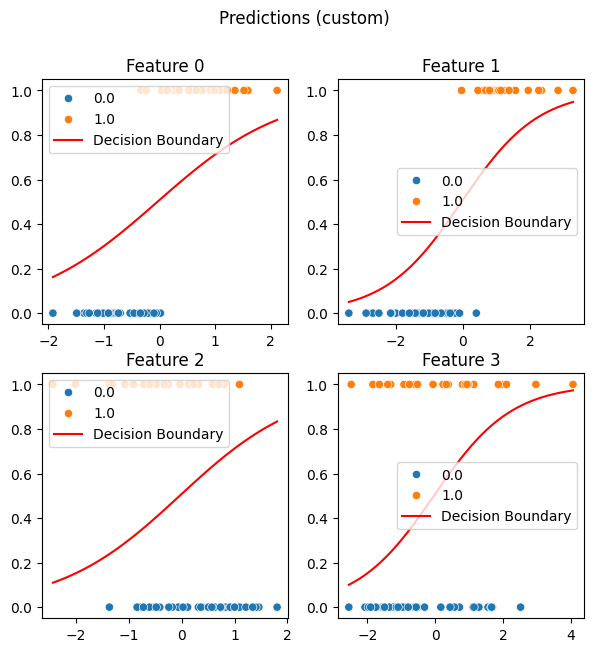

In [31]:
plot(X_test, y_pred, title='Predictions (custom)', model=model)

$$ \dots $$

### Conclusion

Our modal gives the similar dicision boundary as the scikit learn model. 

$$ \dots $$